### Implementing State Vector Simulation using matrix multiplication (dot product)
Improved the matrix multiplication steps

In [1]:
import numpy as np
# Identity gate (I)
I = np.array([
    [1, 0],
    [0, 1]
])
# Pauli-X gate (X)
X = np.array([
    [0, 1],
    [1, 0]
])
# Hadamard gate (H)
H = (1 / np.sqrt(2)) * np.array([
    [1,  1],
    [1, -1]
])
# CNOT gate matrix
CX = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

In [2]:
# number of qubits = n
def apply_on_n_qubits(X_n, H_n, CX_n, n):
    # state of qubit
    state = np.zeros(2**n)
    state[0] = 1 # initial state = 000...
    # applying all gates on all qubits 
    state = X_n @ state
    state = H_n @ state
    state = CX_n @ state
    return state

In [3]:
import time
X_n = X
H_n = H
CX_n = CX
time_taken = []
state_n = []
N = 18

for n in range(2, N):
    start = time.time()
    X_n = np.kron(X_n, X)
    H_n = np.kron(H_n, H)
    if(n%2): # if odd n
        CX_n_odd = np.kron(CX_n, I)
        # apply_on_n_qubits(X_n, H_n, CX_n_odd, n)
        state_n.append(apply_on_n_qubits(X_n, H_n, CX_n_odd, n))
        k = CX_n.shape[0]
        # print(n, "inside if", k)
    else: # if even n
        if(n!=2):
            CX_n = np.kron(CX_n, CX) # extracting CX_n before kron with I
        # apply_on_n_qubits(X_n, H_n, CX_n, n)
        state_n.append(apply_on_n_qubits(X_n, H_n, CX_n, n))
        # print(n, "inside elif")
    # print(n,CX_n.shape)
    time_taken.append(time.time() - start)
    print(n)

2
3
4
5
6
7
8
9
10
11
12
13
14


MemoryError: Unable to allocate 8.00 GiB for an array with shape (16384, 2, 16384, 2) and data type int64

In [ ]:
# state_n

In [4]:
# time_taken = np.array(time_taken)
n_values = [i for i in range(2,(len(time_taken))+2)]
print(time_taken)

[0.0, 0.0, 0.0, 0.0, 0.0010030269622802734, 0.00099945068359375, 0.001995563507080078, 0.012000083923339844, 0.03495383262634277, 0.14006519317626953, 0.5283787250518799, 2.3660051822662354, 11.218851804733276]


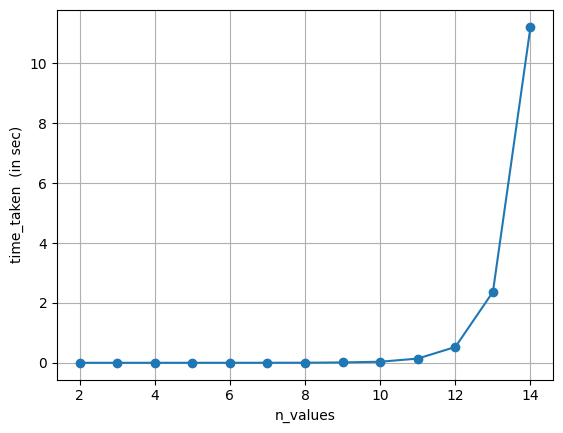

In [5]:
import matplotlib.pyplot as plt
plt.plot(n_values, time_taken, marker='o')
plt.xlabel("n_values")
plt.ylabel("time_taken  (in sec)")
plt.grid(True)
plt.show()